In [12]:
import numpy as np
import matplotlib.pyplot as plt

fichier = "100secondes_200us_count.txt"
data = np.loadtxt(fichier, dtype=int)

In [4]:
# 1. 

t0 = 200E-6
flux_moyen = np.mean(data)/t0
print(flux_moyen)

22972.79


In [6]:
h = 6.6E-34
c = 3E8
lamb = 500E-9
E_photon = h*c/lamb
puissance = flux_moyen*E_photon
print(puissance)

9.09722484e-15


In [8]:
# 2.
print(data.std())
print(np.sqrt(data.mean()))

2.1401156007645943
2.1434920107152253


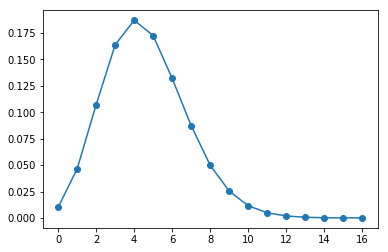

In [16]:
#3.

values, count = np.unique(data, return_counts=True)
plt.plot(values, count/np.sum(count), '-o')

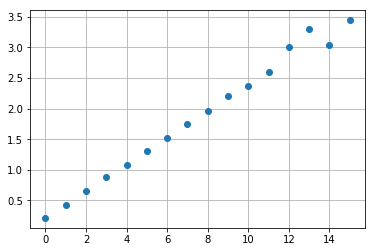

In [20]:
plt.plot(count[:-1]/count[1:], 'o')
plt.grid()

In [39]:
def somme_par_paquet(x, N):
    x = x[len(x)%N:]
    x = x.reshape((len(x)//N, N))
    return x.sum(axis=1)

def moyenne_par_paquet(x, N):
    return somme_par_paquet(x, N)/N

assert np.all(somme_par_paquet(np.arange(9), 2)==np.array([3, 7, 11, 15]))


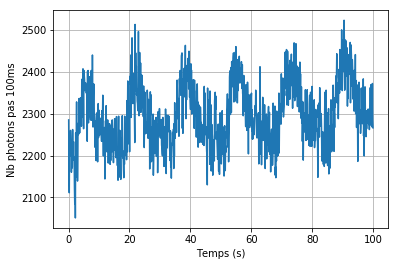

In [40]:
t = np.arange(len(data))*t0
plt.plot(moyenne_par_paquet(t, 500), somme_par_paquet(data, 500))
plt.xlabel('Temps (s)')
plt.ylabel('Nb photons pas 100ms')
plt.grid()

In [42]:
#6.

def bits_aleatoires(data):
    N = len(data)//2
    for i in range(N):
        if data[2*i]>data[2*i+1]:
            yield 1
        elif data[2*i]<data[2*i+1]:
            yield 0

array([0, 1, 1, ..., 0, 0, 1])

In [43]:
%timeit np.array(list(bits_aleatoires(data)))

147 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
def bits_aleatoires(data):
    N = len(data)//2
    dx = data[:N:2] - data[1:N:2]
    dx = dx[dx!=0]
    return np.where(dx>0, 1, 0)

data_bits = bits_aleatoires(data)

In [45]:
%timeit np.array(list(bits_aleatoires(data)))

14.1 ms ± 63.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
data_bits = bits_aleatoires(data)
N = 11

data_bits = data_bits[len(data_bits)%N:]
data_bits = data_bits.reshape((len(data_bits)//N, N))
data_bits
coef = 1/2**(1+np.arange(N))
nb_aleatoires = (data_bits*coef[np.newaxis, :]).sum(axis=1)


In [64]:
nb_aleatoires = nb_aleatoires[len(nb_aleatoires)%2:]
X = nb_aleatoires[::2]
Y = nb_aleatoires[1::2]
4*np.mean((X**2+Y**2)<1)

3.1450629825274277